In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
mssv=24521703
np.random.seed(mssv)
import random

In [76]:
def f(x):
  return np.sin(1+x**2)
def generate_y(x,sigma=0.03):
  x=np.array(x)
  eps=np.random.normal(loc=0.0,scale=sigma,size=x.shape)
  return f(x)+eps
def sinh_random(n,i):
  np.random.seed(i)
  x_values=np.random.uniform(0,1,size=n)
  y_values=generate_y(x_values)
  return x_values,y_values
def ve_bieu_do(x_values,y_values):
  plt.scatter(x_values,y_values,label='Random data',marker='o')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Bieu do truc quan x va y')
  plt.legend()
  plt.show()
def sinh_test(n):
  x_test=np.linspace(0,1,n)
  y_test=generate_y(x_test)
  return x_test,y_test

In [77]:
def huan_luyen(x_train,y_train,x_test,y_test,flag,tieu_de):
  fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # tạo 1 figure + 9 subplot
  fig.suptitle(tieu_de, fontsize=20, y=1.03)
  axes = axes.flatten()  # flatten để truy cập từng ô dễ dàng
  error_data=[]
  for i in range(1,10):
    ax = axes[i-1]  # vẽ bậc i vào subplot thứ i
    poly=PolynomialFeatures(degree=i)
    X_train_poly=poly.fit_transform(x_train.reshape(-1,1))
    X_test_poly=poly.transform(x_test.reshape(-1,1))
    model=LinearRegression()
    model.fit(X_train_poly,y_train)
    y_train_pred=model.predict(X_train_poly)
    y_test_pred=model.predict(X_test_poly)
    mse_train=mean_squared_error(y_train,y_train_pred)
    mse_pred=mean_squared_error(y_test,y_test_pred)
    if flag==1: error_data.append({
            "Degree": int(i),
            "E_in": mse_train,
            "E_out": mse_pred
        })
    x_plot = np.linspace(0,1,100)
    X_plot_poly = poly.transform(x_plot.reshape(-1,1))
    y_plot = model.predict(X_plot_poly)
    ax.plot(x_plot, y_plot, label=f'Degree {i}')
    ax.scatter(x_train, y_train, color='blue', label='Train')
    ax.scatter(x_test, y_test, color='red', label='Test')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Polynomial Regression 1 variable degree '+str(i))
    ax.legend()
    ax.set_ylim(0.5,1.2) # Áp dụng giới hạn Y chung
  plt.tight_layout()
  plt.show()
  if flag==1:
    print("\n--- Bảng tổng kết lỗi MSE cho tập D1---")
    df = pd.DataFrame(error_data)
    print(tabulate(df, headers='keys', tablefmt='grid', showindex=False, floatfmt=(".0f", ".6f", ".6f")))

**Experiment 1**

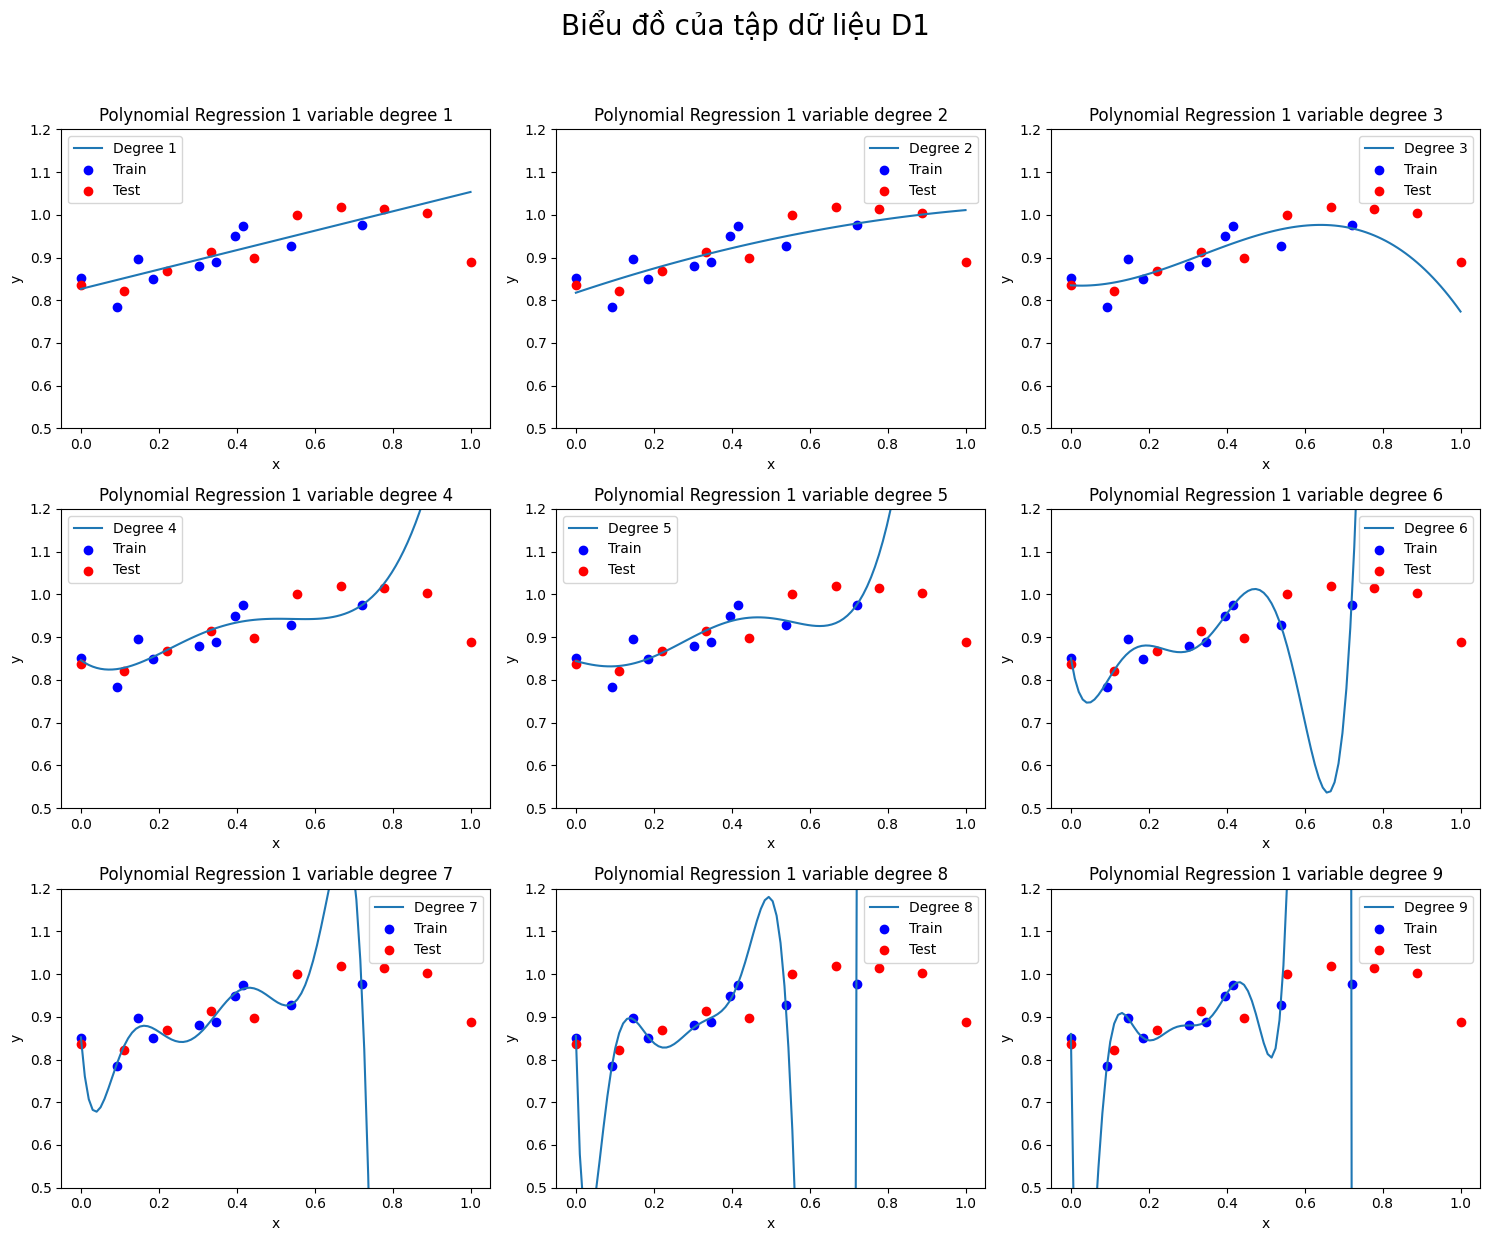


--- Bảng tổng kết lỗi MSE cho tập D1---
+----------+----------+-----------------+
|   Degree |     E_in |           E_out |
+==========+==========+=================+
|        1 | 0.001142 |        0.003388 |
+----------+----------+-----------------+
|        2 | 0.001114 |        0.002262 |
+----------+----------+-----------------+
|        3 | 0.001000 |        0.003573 |
+----------+----------+-----------------+
|        4 | 0.000870 |        0.078370 |
+----------+----------+-----------------+
|        5 | 0.000857 |        0.645463 |
+----------+----------+-----------------+
|        6 | 0.000235 |      521.214280 |
+----------+----------+-----------------+
|        7 | 0.000180 |     3568.771451 |
+----------+----------+-----------------+
|        8 | 0.000024 |   997557.898787 |
+----------+----------+-----------------+
|        9 | 0.000000 | 21873652.652497 |
+----------+----------+-----------------+



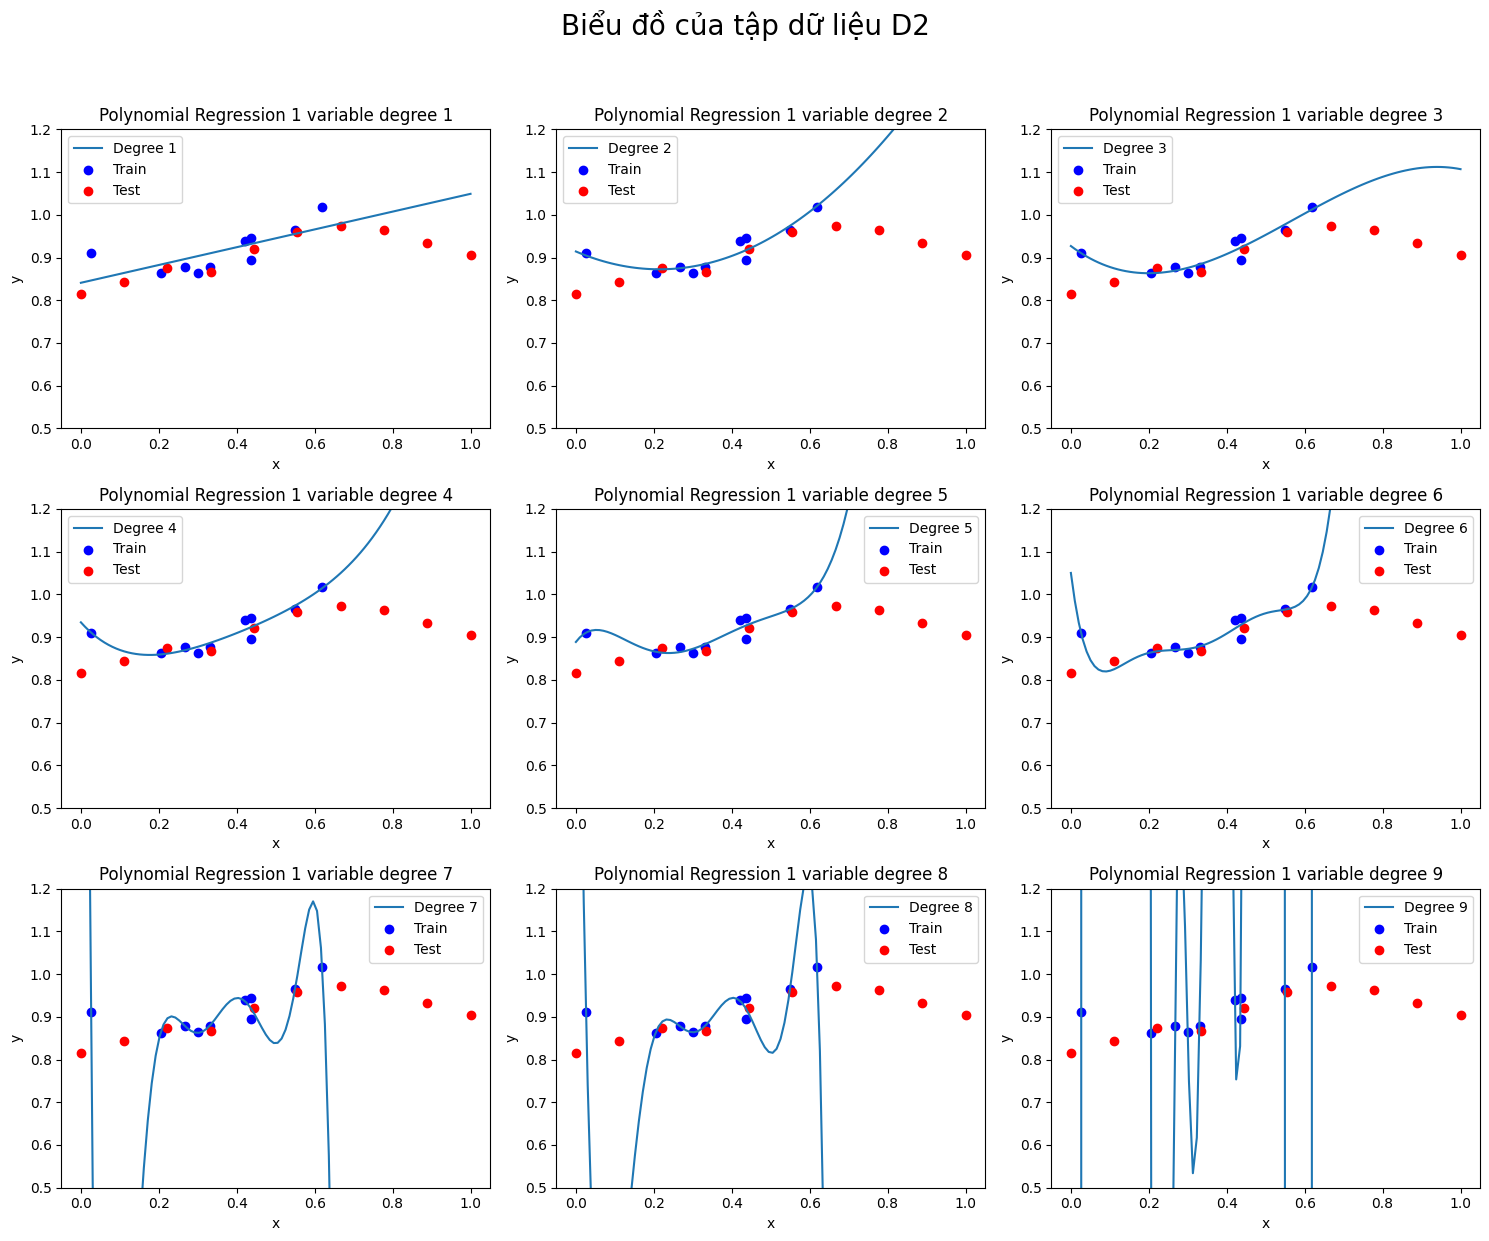

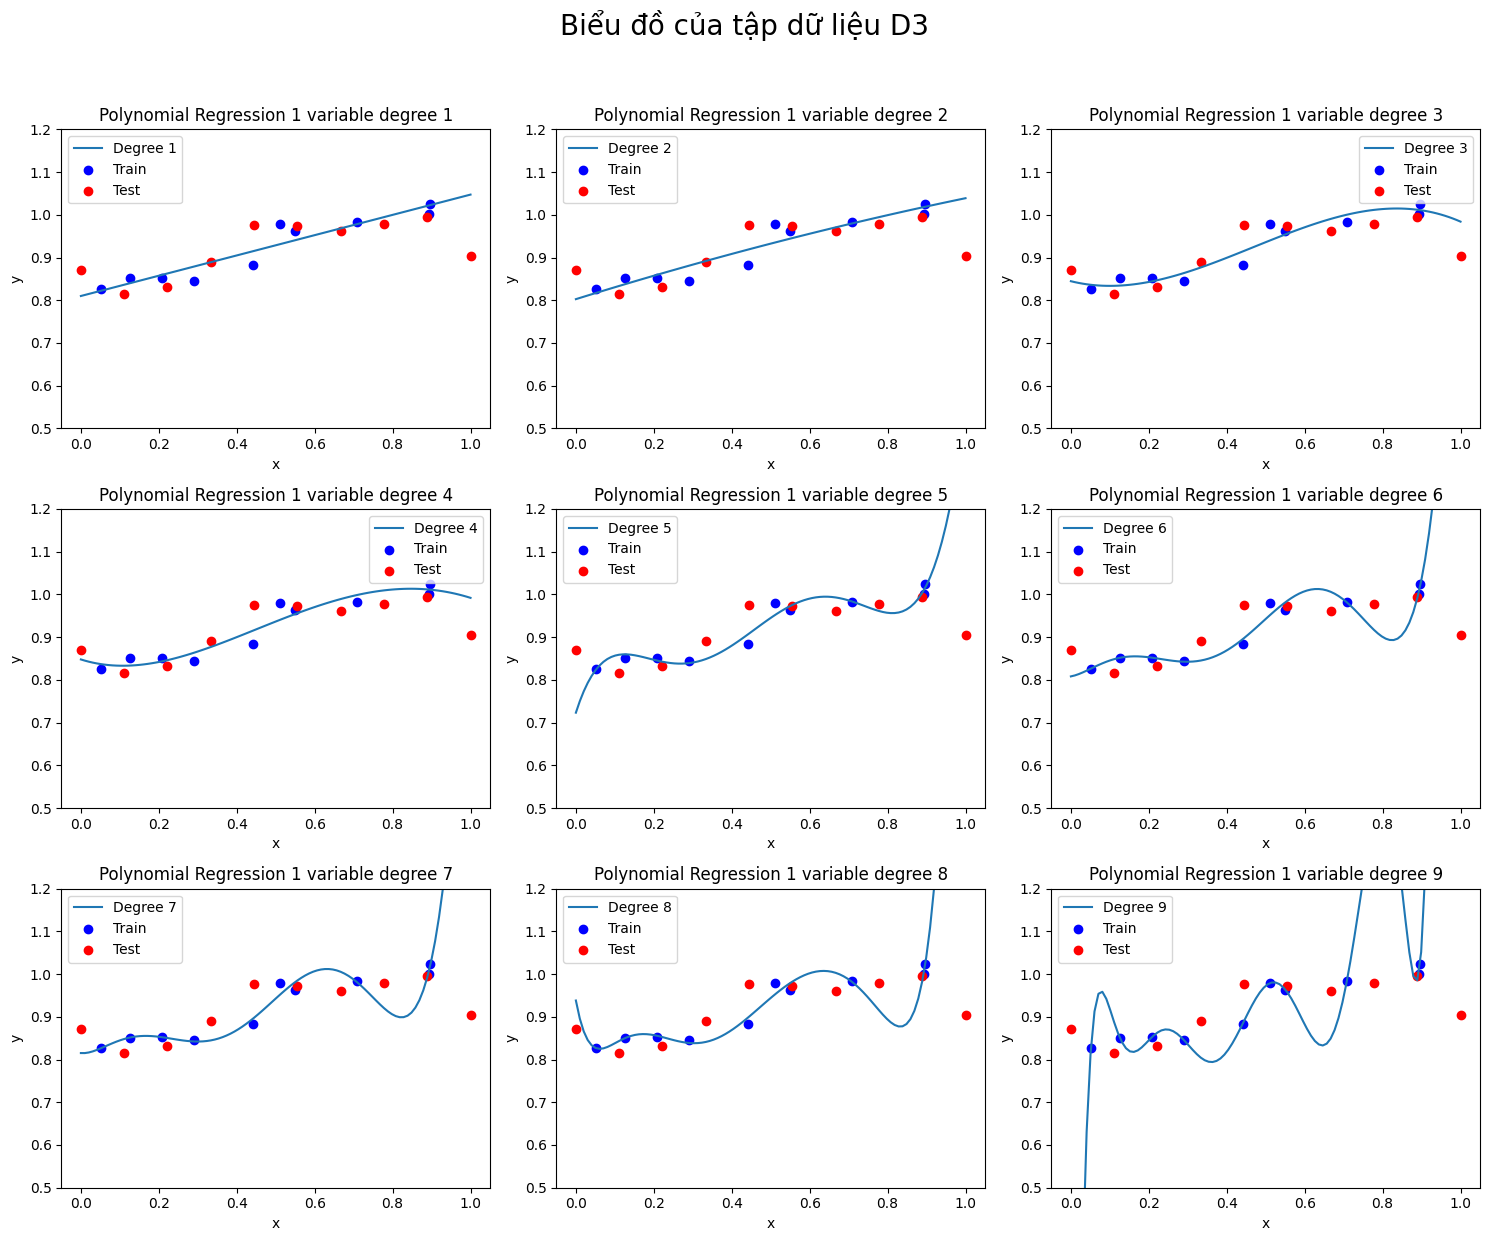

In [78]:
for i in range(1,4):
  x1_train,y1_train=sinh_random(10,i)
  x1_test,y1_test=sinh_test(10)
  tieu_de = f'Biểu đồ của tập dữ liệu D{i}'
  huan_luyen(x1_train, y1_train, x1_test, y1_test,i,tieu_de)
  print()


**Experiment 2**

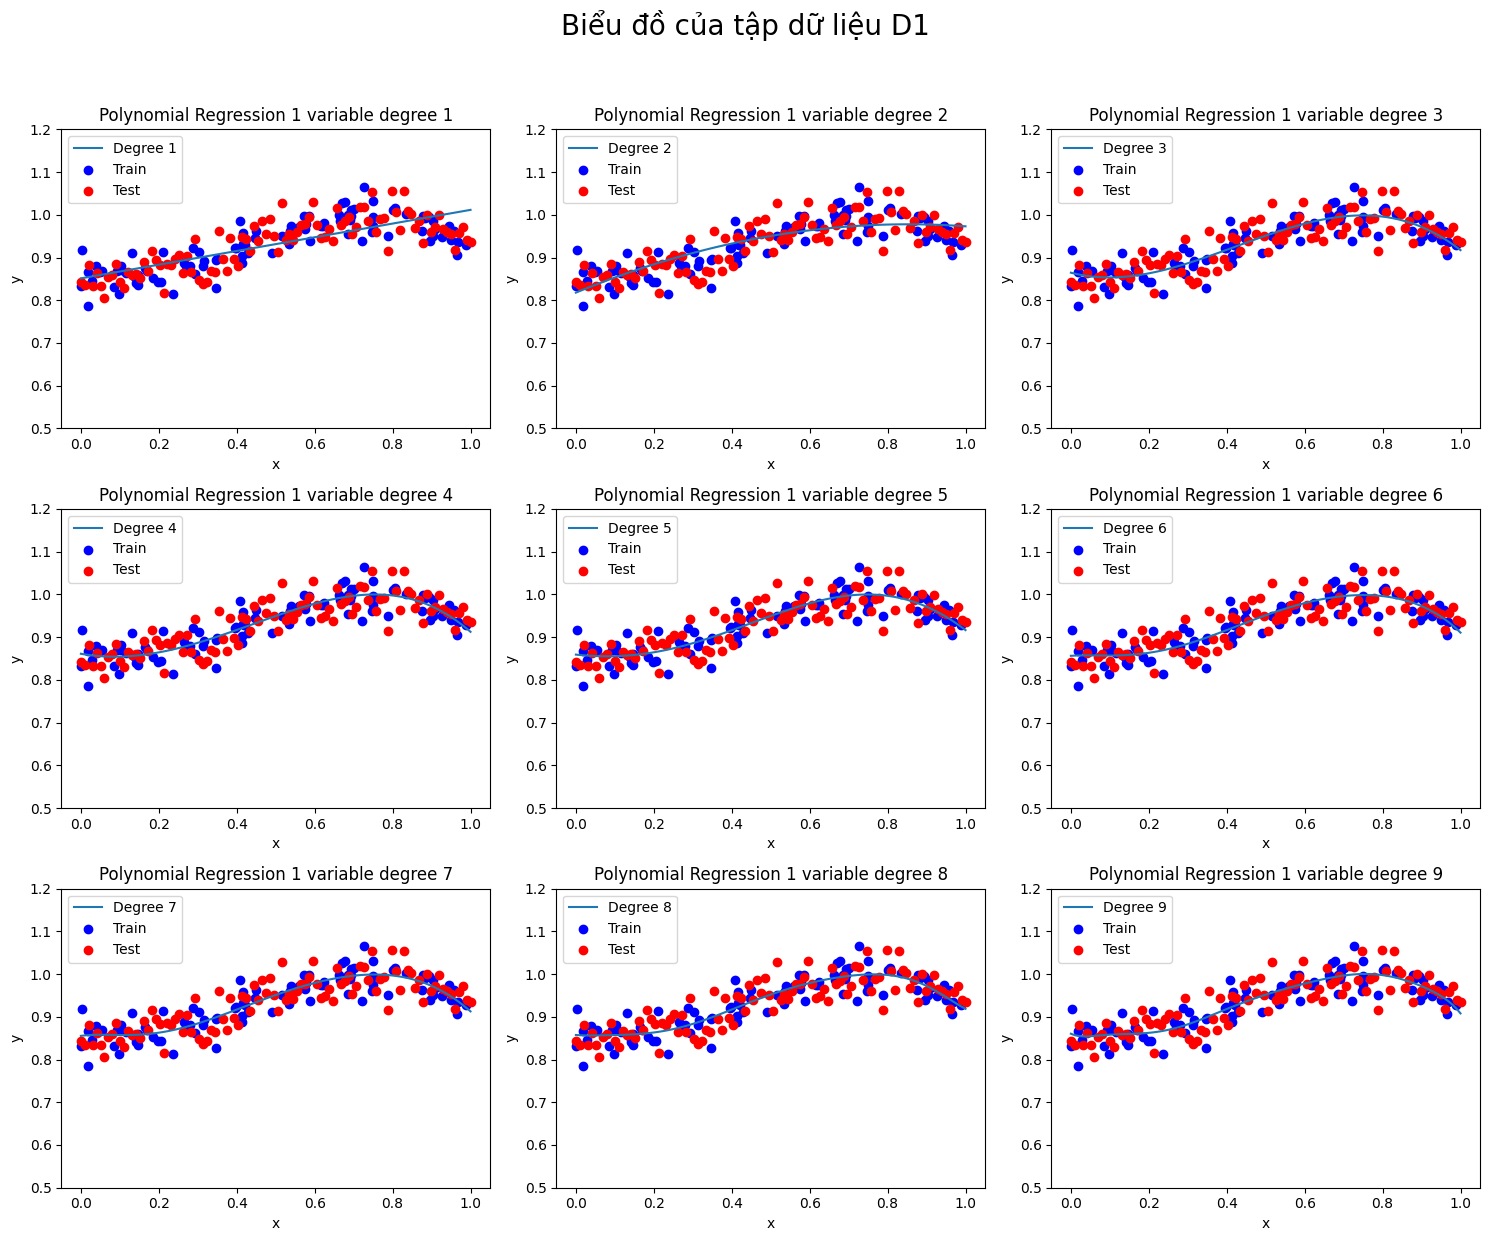


--- Bảng tổng kết lỗi MSE cho tập D1---
+----------+----------+----------+
|   Degree |     E_in |    E_out |
+==========+==========+==========+
|        1 | 0.001385 | 0.001446 |
+----------+----------+----------+
|        2 | 0.001108 | 0.001147 |
+----------+----------+----------+
|        3 | 0.000709 | 0.000949 |
+----------+----------+----------+
|        4 | 0.000707 | 0.000951 |
+----------+----------+----------+
|        5 | 0.000707 | 0.000947 |
+----------+----------+----------+
|        6 | 0.000705 | 0.000949 |
+----------+----------+----------+
|        7 | 0.000705 | 0.000948 |
+----------+----------+----------+
|        8 | 0.000704 | 0.000935 |
+----------+----------+----------+
|        9 | 0.000703 | 0.000944 |
+----------+----------+----------+



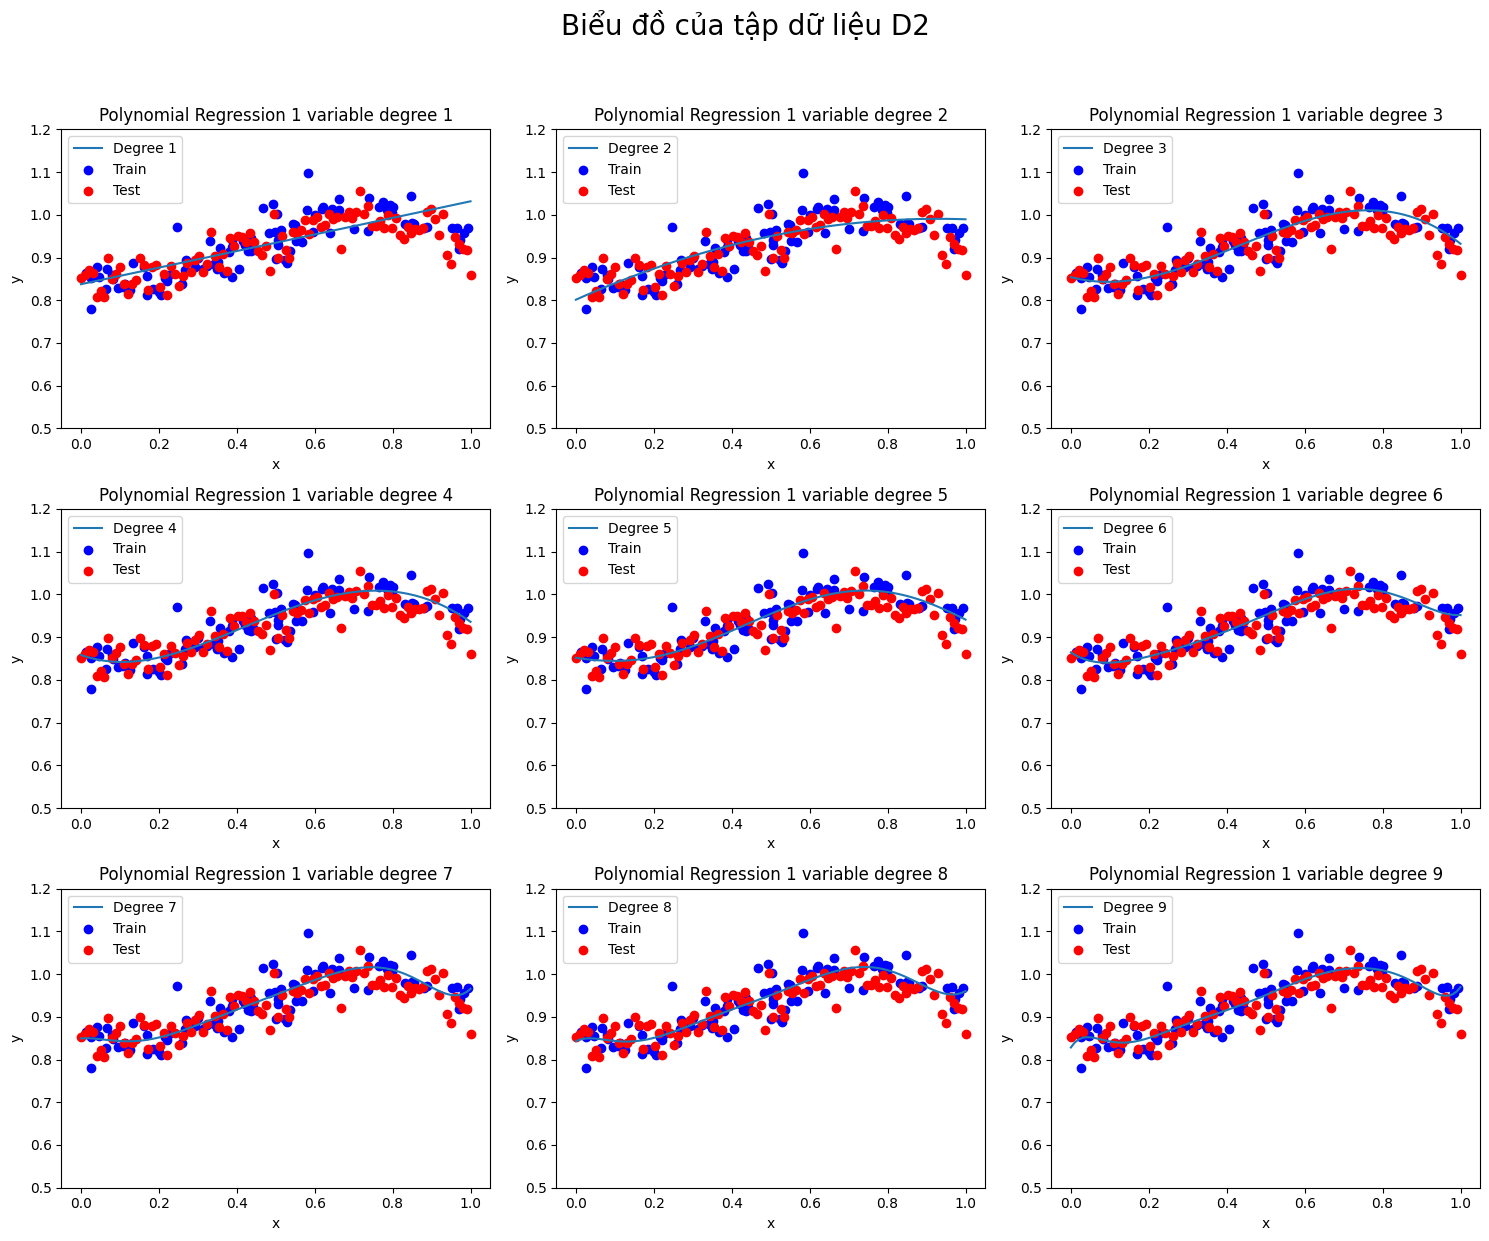

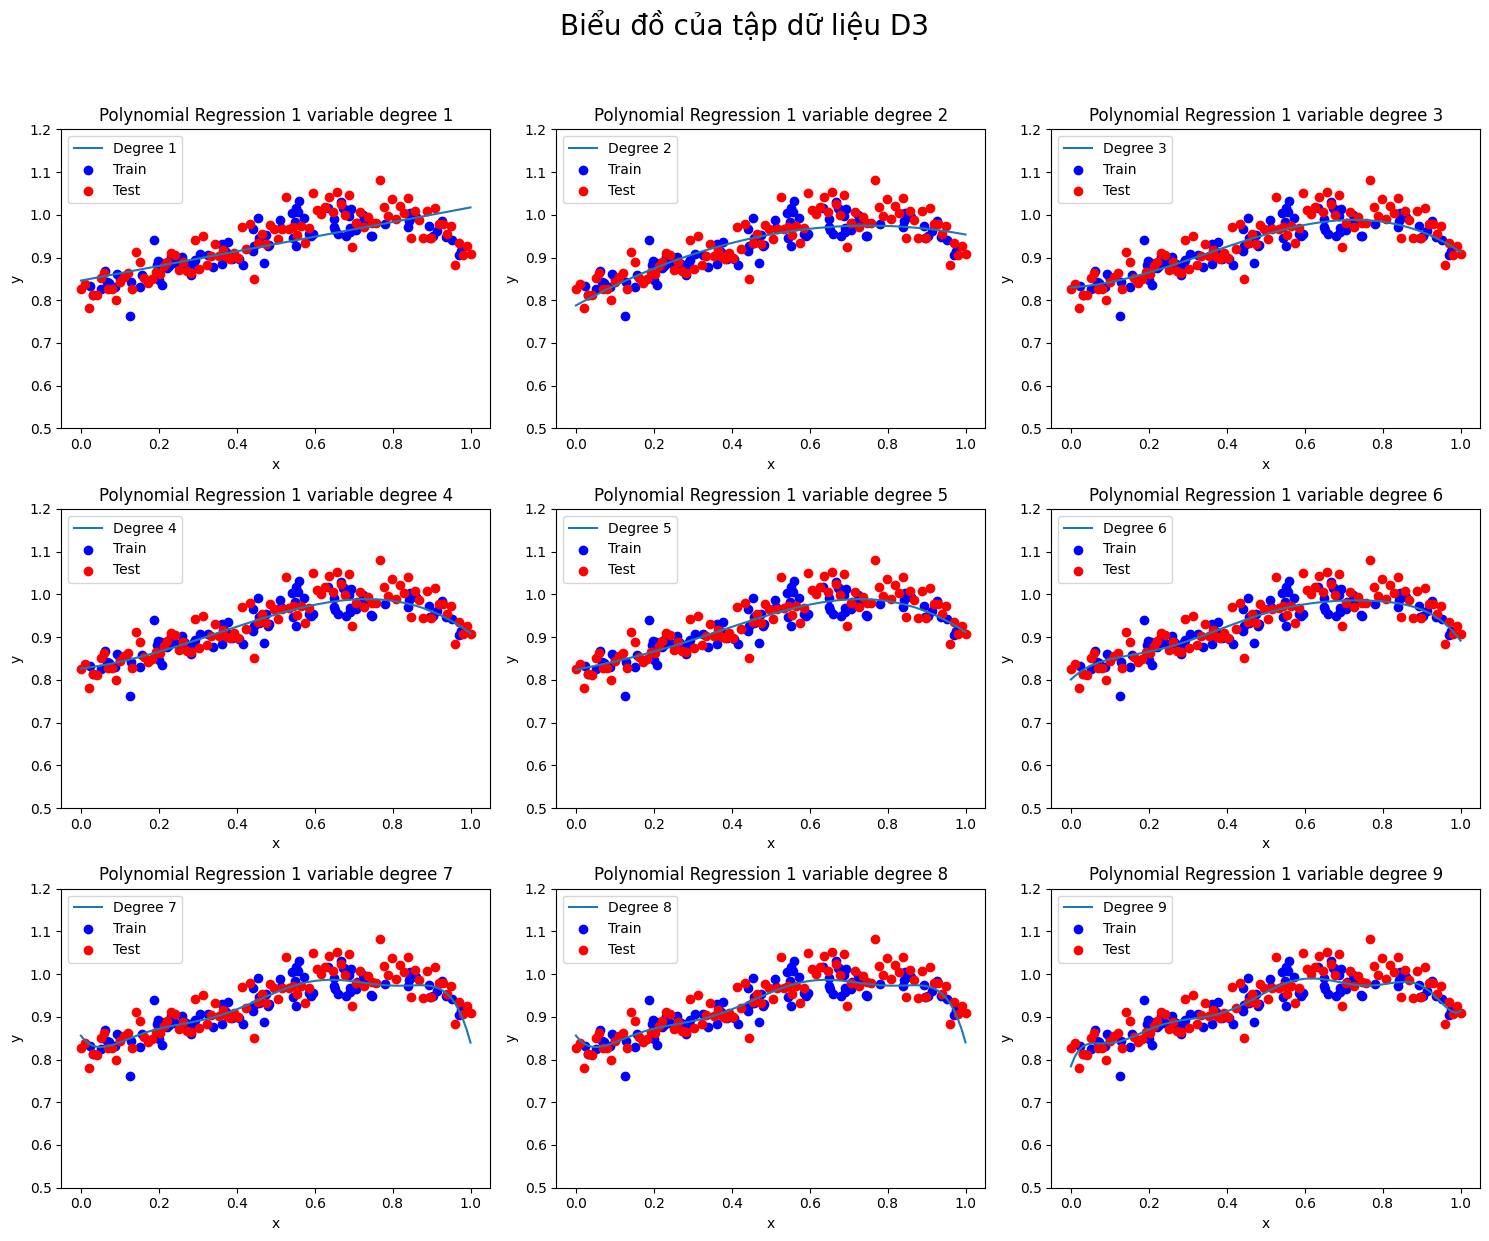

In [79]:
for i in range(1,4):
  x2_train,y2_train=sinh_random(100,i)
  x2_test,y2_test=sinh_test(100)
  tieu_de = f'Biểu đồ của tập dữ liệu D{i}'
  huan_luyen(x2_train, y2_train, x2_test, y2_test,i,tieu_de)
  print()


**Experiment 3(n=1000)**

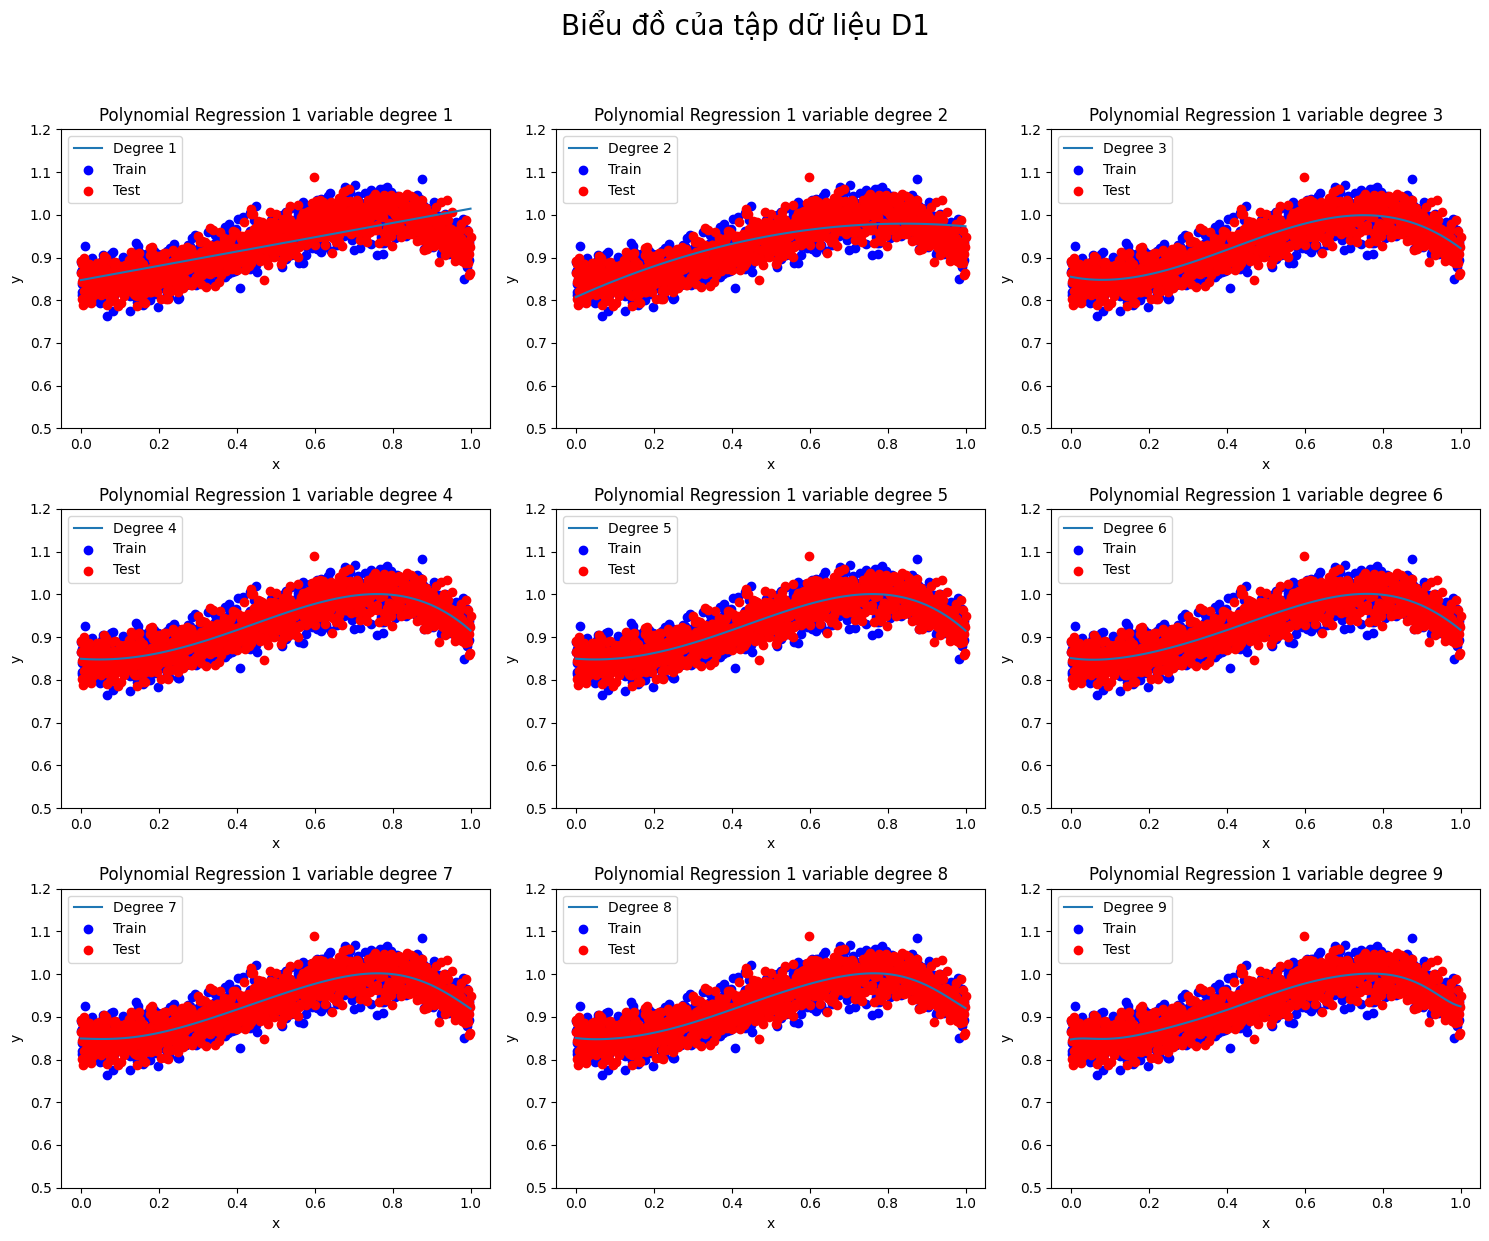


--- Bảng tổng kết lỗi MSE cho tập D1---
+----------+----------+----------+
|   Degree |     E_in |    E_out |
+==========+==========+==========+
|        1 | 0.001633 | 0.001684 |
+----------+----------+----------+
|        2 | 0.001300 | 0.001266 |
+----------+----------+----------+
|        3 | 0.000933 | 0.000881 |
+----------+----------+----------+
|        4 | 0.000929 | 0.000877 |
+----------+----------+----------+
|        5 | 0.000929 | 0.000877 |
+----------+----------+----------+
|        6 | 0.000929 | 0.000876 |
+----------+----------+----------+
|        7 | 0.000928 | 0.000876 |
+----------+----------+----------+
|        8 | 0.000928 | 0.000876 |
+----------+----------+----------+
|        9 | 0.000928 | 0.000877 |
+----------+----------+----------+



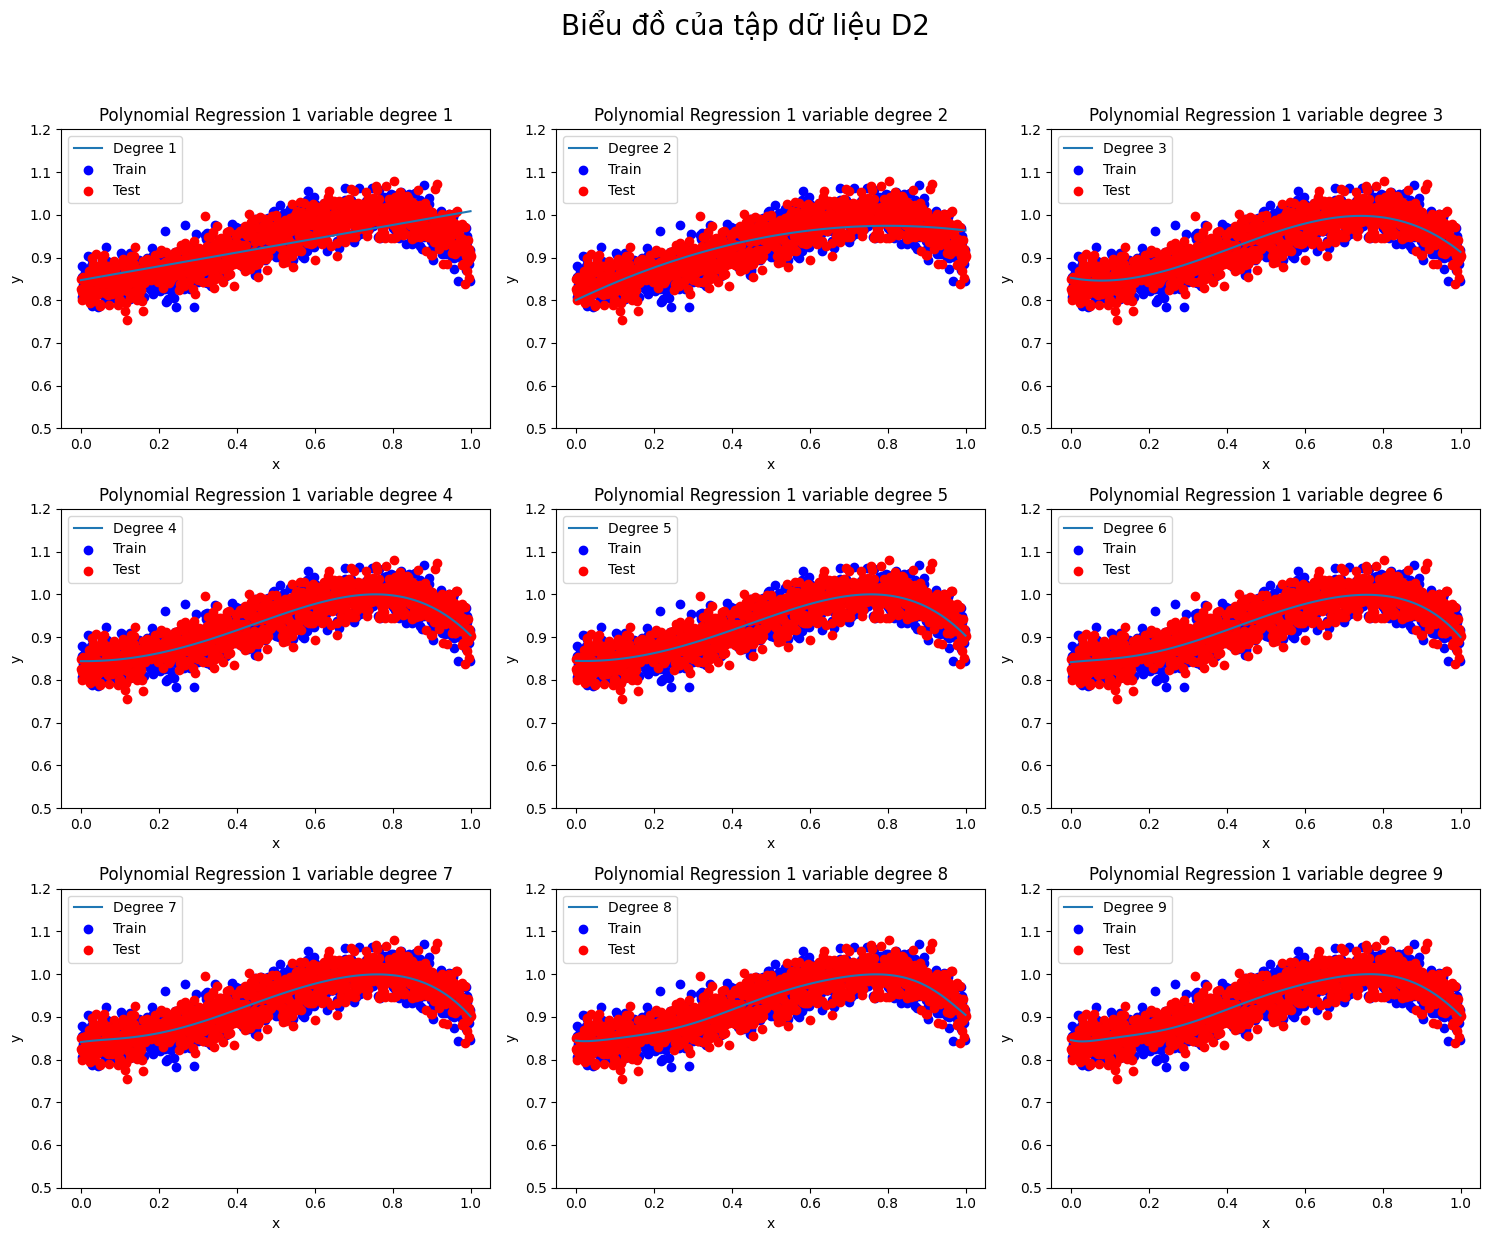

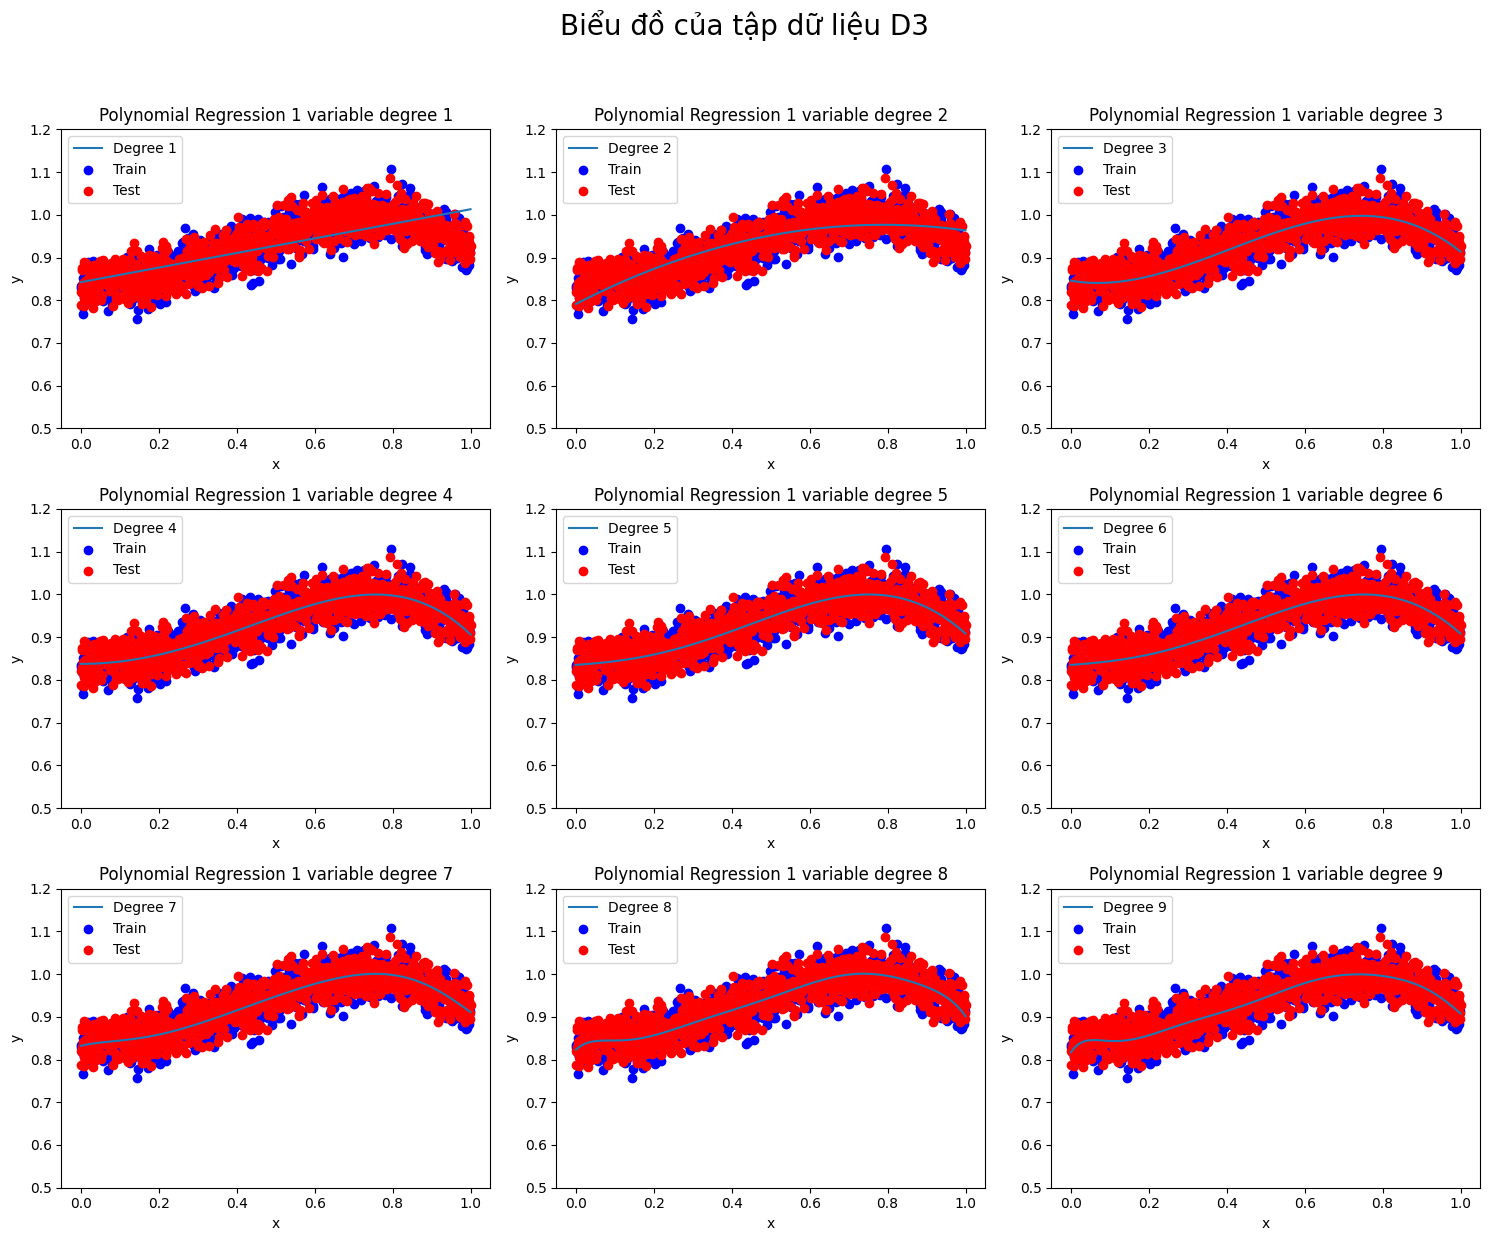

In [80]:
for i in range(1,4):
  x3_train,y3_train=sinh_random(1000,i)
  x3_test,y3_test=sinh_test(1000)
  tieu_de = f'Biểu đồ của tập dữ liệu D{i}'
  huan_luyen(x3_train, y3_train, x3_test, y3_test,i,tieu_de)
  print()


Thông qua kết quả thực nghiệm, em có thể rút ra một số nhận xét sau:
1. Khi tăng độ phức tạp của mô hình dẫn đến giảm bias

Vì mô hình phức tạp linh hoạt hơn, nó có thể uốn lượn để khớp hoàn hảo với dữ liệu train. Ta thấy với tập 10 điểm dữ liệu dùng mô hình polynomial regression bậc 9 khớp hoàn hảo với tập train dẫn đến $E_{in}=0$. Vì vậy bias sẽ giảm.

2. Tăng độ phức tạp của mô hình làm tăng variance.

Vì mô hình quá phức tạp nên nó không chỉ học xu hướng chung của dữ liệu mà còn học cả nhiễu, dẫn đến hiện tượng overfit trên tập train. Điều đó làm cho mô hình dự đoán rất tệ trên tập test. Khi đó khoảng cách giữa $E_{out}$ và $E_{in}$ ngày càng lớn dẫn đến variance tăng.


3. Tăng kích thước tập train không làm thay đổi bias

Việc tăng kích thước tập train không làm thay đổi sự linh hoạt hay bản chất của mô hình, ví dụ mô hình bậc 1 khi huấn luyện với tập dữ liệu 1000 điểm vẫn chỉ tìm ra 1 đường thẳng, nó không thể tự uốn cong mình để khớp tốt hơn. Vì vậy không thể làm thay đổi bias bằng việc tăng kích thước tập train

4. Tăng kích thước tập train làm giảm variance

Khi có ít dữ liệu train, mô hình sẽ học luôn cả những điểm nhiễu nên sẽ dự đoán sai trên tập test. Khi tăng kích thước tập train, các điểm nhiễu sẽ tự triệt tiêu lẫn nhau, mô hình buộc phải học xu hướng của dữ liệu, từ đó có thể dự đoán tốt trên tập test và tránh overfitting, dẫn đến phương sai giảm.